In [ ]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
df = pd.read_csv('mvreview.csv',encoding='cp1252')
df.head()

,reviews
0,After the success of Die Hard and it's sequels...
1,I had the terrible misfortune of having to vie...
2,"What an absolutely stunning movie, if you have..."
3,"First of all, let's get a few things straight ..."
4,This was the worst movie I saw at WorldFest an...


In [ ]:
import re
def clean_text(text):
    text = re.sub('[^A-Za-z]+',' ',text)
    return text
df['Cleaned Reviews'] = df['reviews'].apply(clean_text)
df.head()

,reviews,Cleaned Reviews
0,After the success of Die Hard and it's sequels...,After the success of Die Hard and it s sequels...
1,I had the terrible misfortune of having to vie...,I had the terrible misfortune of having to vie...
2,"What an absolutely stunning movie, if you have...",What an absolutely stunning movie if you have ...
3,"First of all, let's get a few things straight ...",First of all let s get a few things straight h...
4,This was the worst movie I saw at WorldFest an...,This was the worst movie I saw at WorldFest an...


In [ ]:
from hashlib import new
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('punkt')# for tokenization
nltk.download('omw-1.4') #for wordnet
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
pos_dict = {'J':wordnet.ADJ,'N':wordnet.NOUN,'V':wordnet.VERB,'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    new_list = []
    for word,tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            new_list.append(tuple([word,pos_dict.get(tag[0])]))
    return new_list
df['POS Stopped'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

,reviews,Cleaned Reviews,POS Stopped
0,After the success of Die Hard and it's sequels...,After the success of Die Hard and it s sequels...,"[(success, n), (Die, n), (Hard, n), (sequels, ..."
1,I had the terrible misfortune of having to vie...,I had the terrible misfortune of having to vie...,"[(terrible, a), (misfortune, n), (view, v), (b..."
2,"What an absolutely stunning movie, if you have...",What an absolutely stunning movie if you have ...,"[(absolutely, r), (stunning, a), (movie, n), (..."
3,"First of all, let's get a few things straight ...",First of all let s get a few things straight h...,"[(First, n), (let, n), (get, v), (things, n), ..."
4,This was the worst movie I saw at WorldFest an...,This was the worst movie I saw at WorldFest an...,"[(worst, a), (movie, n), (saw, v), (WorldFest,..."


In [ ]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_words):
    lemma_rew = " "
    for word,pos in pos_words:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + ' ' + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word,pos=pos)
            lemma_rew = lemma_rew + ' ' + lemma
    return lemma_rew

df['Lemma'] = df['POS Stopped'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS Stopped,Lemma
0,After the success of Die Hard and it's sequels...,After the success of Die Hard and it s sequels...,"[(success, n), (Die, n), (Hard, n), (sequels, ...",success Die Hard sequel surprise really glut...
1,I had the terrible misfortune of having to vie...,I had the terrible misfortune of having to vie...,"[(terrible, a), (misfortune, n), (view, v), (b...",terrible misfortune view b movie entirety br...
2,"What an absolutely stunning movie, if you have...",What an absolutely stunning movie if you have ...,"[(absolutely, r), (stunning, a), (movie, n), (...",absolutely stunning movie hrs kill watch reg...
3,"First of all, let's get a few things straight ...",First of all let s get a few things straight h...,"[(First, n), (let, n), (get, v), (things, n), ...",First let get thing straight anime fan alway...
4,This was the worst movie I saw at WorldFest an...,This was the worst movie I saw at WorldFest an...,"[(worst, a), (movie, n), (saw, v), (WorldFest,...",bad movie saw WorldFest also receive least a...


In [ ]:
fin_data = pd.DataFrame(df[['reviews','Lemma']])
fin_data

,reviews,Lemma
0,After the success of Die Hard and it's sequels...,success Die Hard sequel surprise really glut...
1,I had the terrible misfortune of having to vie...,terrible misfortune view b movie entirety br...
2,"What an absolutely stunning movie, if you have...",absolutely stunning movie hrs kill watch reg...
3,"First of all, let's get a few things straight ...",First let get thing straight anime fan alway...
4,This was the worst movie I saw at WorldFest an...,bad movie saw WorldFest also receive least a...
5,The Karen Carpenter Story shows a little more ...,Karen Carpenter Story show little singer Kar...
6,"""The Cell"" is an exotic masterpiece, a dizzyin...",Cell exotic masterpiece dizzying trip vast m...
7,This film tried to be too many things all at o...,film try many thing sting political satire H...
8,This movie was so frustrating. Everything seem...,movie frustrating Everything seem energetic ...
9,'War movie' is a Hollywood genre that has been...,War movie Hollywood genre do redo many time ...


In [ ]:
from textblob import TextBlob
def subjectivityScore(review):
    return TextBlob(review).sentiment.subjectivity
def polarityScore(review):
    return TextBlob(review).sentiment.polarity
def analysis(Score):
    if Score < 0 :
        return 'Negative'
    elif Score == 0:
        return 'Neutral'
    else:
        return 'Postive'

In [ ]:
fin_data['Polarity'] = fin_data['Lemma'].apply(polarityScore)
fin_data['Analysis'] = fin_data['Polarity'].apply(analysis)

In [ ]:
fin_data.head()

,reviews,Lemma,Polarity,Analysis
0,After the success of Die Hard and it's sequels...,success Die Hard sequel surprise really glut...,0.035101,Postive
1,I had the terrible misfortune of having to vie...,terrible misfortune view b movie entirety br...,-0.176833,Negative
2,"What an absolutely stunning movie, if you have...",absolutely stunning movie hrs kill watch reg...,0.333333,Postive
3,"First of all, let's get a few things straight ...",First let get thing straight anime fan alway...,-0.039553,Negative
4,This was the worst movie I saw at WorldFest an...,bad movie saw WorldFest also receive least a...,0.045370,Postive


In [ ]:
tb_counts = fin_data.Analysis.value_counts()
tb_counts

Postive     37
Negative    12
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x20d32a47b20>,
 [Text(-0.790184279258688, 0.7652508117032141, 'Postive'),
  Text(0.7901842792586878, -0.7652508117032142, 'Negative')],
 [Text(-0.43100960686837525, 0.4174095336562985, '75.5%'),
  Text(0.43100960686837514, -0.41740953365629857, '24.5%')])

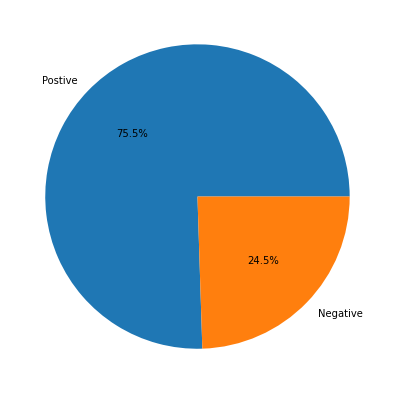

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

tb_count= fin_data.Analysis.value_counts()
plt.figure(figsize=(10, 7))
plt.pie(tb_counts.values, labels = tb_counts.index, autopct='%1.1f%%', shadow=False)

In [ ]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
def vadersentimentanalyzer(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']
fin_data['Vader Sentiment'] = fin_data['Lemma'].apply(vadersentimentanalyzer)
fin_data.head()

,reviews,Lemma,Polarity,Analysis,Vader Sentiment
0,After the success of Die Hard and it's sequels...,success Die Hard sequel surprise really glut...,0.035101,Postive,0.8666
1,I had the terrible misfortune of having to vie...,terrible misfortune view b movie entirety br...,-0.176833,Negative,-0.9347
2,"What an absolutely stunning movie, if you have...",absolutely stunning movie hrs kill watch reg...,0.333333,Postive,0.4536
3,"First of all, let's get a few things straight ...",First let get thing straight anime fan alway...,-0.039553,Negative,0.8836
4,This was the worst movie I saw at WorldFest an...,bad movie saw WorldFest also receive least a...,0.045370,Postive,0.9049


In [ ]:
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'
fin_data['Vader Analysis'] = fin_data['Vader Sentiment'].apply(vader_analysis)
fin_data.head()

,reviews,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis
0,After the success of Die Hard and it's sequels...,success Die Hard sequel surprise really glut...,0.035101,Postive,0.8666,Positive
1,I had the terrible misfortune of having to vie...,terrible misfortune view b movie entirety br...,-0.176833,Negative,-0.9347,Negative
2,"What an absolutely stunning movie, if you have...",absolutely stunning movie hrs kill watch reg...,0.333333,Postive,0.4536,Neutral
3,"First of all, let's get a few things straight ...",First let get thing straight anime fan alway...,-0.039553,Negative,0.8836,Positive
4,This was the worst movie I saw at WorldFest an...,bad movie saw WorldFest also receive least a...,0.045370,Postive,0.9049,Positive


In [ ]:
vader_counts = fin_data['Vader Analysis'].value_counts()
vader_counts

Positive    30
Negative    15
Neutral      4
Name: Vader Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x20d343bb310>,
 [Text(-0.41443808682371314, 1.1261620985408365, 'Positive'),
  Text(0.1056253808012715, -1.0949170191985267, 'Negative'),
  Text(1.0640243638709301, -0.2790199868989008, 'Neutral')],
 [Text(-0.241755550647166, 0.6569278908154879, '61.2%'),
  Text(0.05761384407342081, -0.5972274650173781, '30.6%'),
  Text(0.58037692574778, -0.15219272012667312, '8.2%')])

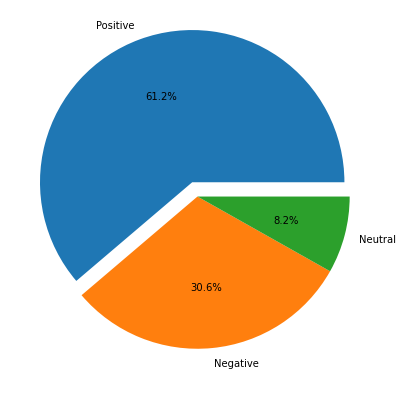

In [ ]:
vader_counts= fin_data['Vader Analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0.1, 0, 0), autopct='%1.1f%%', shadow=False)
# plt.legend()

([<matplotlib.patches.Wedge at 0x20d343d4340>,
 [Text(-0.3799015795884037, 1.0323152569957668, 'Positive'),
  Text(0.12963114916519683, -1.3437617962891009, 'Negative'),
  Text(1.3058480829325052, -0.34243362028501456, 'Neutral')],
 [Text(-0.20721904341185657, 0.5630810492704181, '61.2%'),
  Text(0.08161961243734614, -0.8460722421079523, '30.6%'),
  Text(0.822200644809355, -0.21560635351278692, '8.2%')])

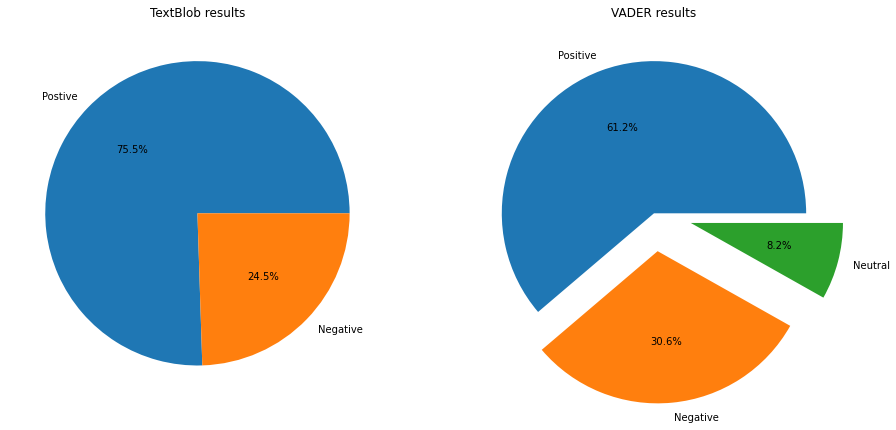

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title("TextBlob results")
plt.pie(tb_counts.values, labels = tb_counts.index, autopct='%1.1f%%', shadow=False)
plt.subplot(1,2,2)
plt.title("VADER results")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0.25, 0.25), autopct='%1.1f%%', shadow=False)